In [3]:

import numpy as np
from random import randint

In [4]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_labels=[]
train_samples=[]

In [6]:
for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [7]:
for i in train_samples:
  print(i)

53
95
56
70
54
84
47
76
27
71
40
78
30
96
43
72
17
94
58
93
48
91
34
81
62
79
28
66
47
93
40
91
28
69
45
72
25
79
18
77
23
71
25
82
26
70
40
81
22
92
27
96
56
75
32
83
41
73
39
80
44
67
31
99
61
78
32
69
27
84
34
92
28
73
31
97
25
86
36
66
26
100
64
68
57
82
60
76
32
85
54
66
59
98
33
96
20
73
23
94
25
97
39
72
56
72
19
65
63
73
26
99
25
81
64
87
52
66
14
79
18
95
35
93
57
69
28
86
42
93
56
81
17
76
51
71
32
99
56
67
18
87
38
100
52
90
58
67
29
71
57
90
29
81
19
70
16
91
60
86
44
96
37
97
36
76
50
92
13
68
59
89
13
77
62
72
30
78
38
86
32
80
46
99
56
70
51
78
34
94
54
98
63
80
35
76
60
95
28
81
62
86
29
79
45
82
57
93
14
94
51
90
49
85
20
79
54
77
19
78
52
100
39
81
62
99
35
85
25
90
64
81
19
93
27
98
42
75
50
83
57
66
47
78
54
97
30
70
32
76
50
90
62
66
22
88
32
82
62
90
17
87
28
66
21
86
41
94
39
77
41
94
19
88
51
65
47
91
48
77
36
71
29
73
54
81
54
88
34
91
37
68
18
94
37
100
37
68
53
81
27
90
44
100
18
98
28
92
50
81
22
76
47
94
53
77
17
86
31
97
37
89
14
89
35
86
29
66
57
84
60
67

In [8]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))
#here -1 means it takes value automatically

In [10]:
for i in scaled_train_samples:
  print(i)

[0.14942529]
[0.81609195]
[0.95402299]
[0.22988506]
[0.17241379]
[0.49425287]
[0.71264368]
[0.17241379]
[0.88505747]
[0.10344828]
[0.36781609]
[0.6091954]
[0.94252874]
[0.8045977]
[0.17241379]
[0.96551724]
[0.42528736]
[0.05747126]
[0.79310345]
[0.59770115]
[0.50574713]
[0.67816092]
[0.55172414]
[0.66666667]
[0.03448276]
[0.47126437]
[0.66666667]
[0.34482759]
[0.94252874]
[0.93103448]
[0.27586207]
[0.26436782]
[0.83908046]
[0.29885057]
[0.79310345]
[0.72413793]
[0.56321839]
[0.12643678]
[0.79310345]
[0.20689655]
[0.44827586]
[0.17241379]
[0.20689655]
[0.64367816]
[1.]
[0.68965517]
[0.43678161]
[0.98850575]
[0.1954023]
[0.96551724]
[0.11494253]
[0.89655172]
[0.28735632]
[0.27586207]
[0.93103448]
[0.3908046]
[0.5862069]
[0.40229885]
[0.89655172]
[0.27586207]
[0.94252874]
[0.75862069]
[0.42528736]
[0.18390805]
[0.45977011]
[0.90804598]
[0.31034483]
[0.28735632]
[0.35632184]
[0.93103448]
[0.83908046]
[0.34482759]
[0.44827586]
[0.7816092]
[0.50574713]
[0.73563218]
[0.73563218]
[0.44827586]


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_accuracy

In [12]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='relu')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.5984 - accuracy: 0.7714 - val_loss: 0.5563 - val_accuracy: 0.8476
Epoch 2/30
189/189 - 0s - loss: 0.5119 - accuracy: 0.8354 - val_loss: 0.5250 - val_accuracy: 0.9429
Epoch 3/30
189/189 - 0s - loss: 0.6457 - accuracy: 0.8201 - val_loss: 0.6279 - val_accuracy: 0.8429
Epoch 4/30
189/189 - 0s - loss: 0.6261 - accuracy: 0.8127 - val_loss: 0.6459 - val_accuracy: 0.7429
Epoch 5/30
189/189 - 0s - loss: 0.6408 - accuracy: 0.7243 - val_loss: 0.7199 - val_accuracy: 0.6095
Epoch 6/30
189/189 - 0s - loss: 0.6640 - accuracy: 0.5984 - val_loss: 0.6931 - val_accuracy: 0.4571
Epoch 7/30
189/189 - 0s - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.4571
Epoch 8/30
189/189 - 0s - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.4571
Epoch 9/30
189/189 - 0s - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.4571
Epoch 10/30
189/189 - 0s - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.4571

In [16]:
test_labels=[]
test_samples=[]

In [17]:
for i in range(10):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(300):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [18]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)

In [19]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [20]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [21]:
for i in predictions:
  print(i)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


In [22]:
rounded_predictions=np.argmax(predictions,axis=1)

In [23]:
for i in rounded_predictions:
  print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [26]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



Confusion matrix,without normalization
[[310   0]
 [310   0]]


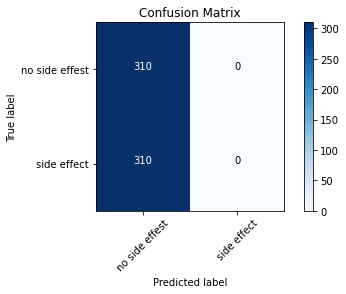

In [27]:
cm_plot_labels=['no side effest','side effect']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels)

In [28]:
model.save('model1.h5')

In [29]:
#load pre saved model
from tensorflow.keras.models import load_model
new_model=load_model('model1.h5')

In [30]:
new_model.get_weights()

[array([[-0.2652899 , -0.393259  ,  0.4723052 , -0.3929438 ,  0.03643308,
         -0.1801686 , -0.19462666, -0.35578394,  0.15956582,  0.09573957,
         -0.07958186,  0.20125909, -0.2440544 , -0.0053277 ,  0.5146106 ,
         -0.15584502]], dtype=float32),
 array([ 0.        ,  0.        , -0.01088197,  0.        ,  0.01525464,
         0.        ,  0.        ,  0.        , -0.01262113,  0.01714459,
         0.        , -0.002279  ,  0.        ,  0.        , -0.01343425,
         0.        ], dtype=float32),
 array([[ 0.32462886, -0.3306662 ,  0.3317863 , -0.16634762,  0.30164012,
         -0.26924932, -0.29809007, -0.04498696, -0.31141698,  0.07320631,
          0.0493876 , -0.1718616 ,  0.34169933, -0.03837302, -0.18466742,
         -0.17525063,  0.17972443,  0.31173328, -0.2554325 ,  0.22549751,
         -0.24374677,  0.22799817, -0.22954091, -0.25513738,  0.31157026,
         -0.05182451, -0.21860205,  0.1506609 ,  0.10685676, -0.1734777 ,
          0.12018299,  0.1156143 ],
 

In [31]:
new_model.optimizer